# ================================================================
# GAZA HUNGER PREDICTION - COMPLETE JUPYTER NOTEBOOK
# Multi-Class Classification for Household Hunger Severity
# ================================================================


#  Gaza Hunger Prediction Project
#
# **Objective:** Predict household hunger severity using the Household Hunger Scale (HHS)
#
# **Models:** Logistic Regression | Random Forest | Gradient Boosting
#
# **Dataset:** 1,209 households from Gaza Strip (May-July 2024)


### STEP 1: Setup and Imports


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Sklearn - Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Sklearn - Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Sklearn - Evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, f1_score,
    precision_recall_fscore_support, accuracy_score
)
from sklearn.utils import resample

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
print("✅ sklearn works!")


✅ sklearn works!


### STEP 2: Load Data


In [3]:
# Load the dataset
# Upload 'GazaHungerData.xlsx' to your Colab environment first.
filepath = r"C:\Users\HP\Desktop\test\GazaHungerData.xlsx"  # Update this path if the file is in a different location after uploading
df = pd.read_excel(filepath)

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset Shape: (1209, 50)

First few rows:


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,Yes,Yes,Yes,Yes,Yes,No,No,Sometimes,Mostly,Sometimes,...,6,168,Married,29,Yes,Bachelor,PartDestruction,City,Tent,Intermittently
1,Yes,Yes,Yes,No,Yes,No,No,Rarely,Mostly,Mostly,...,4,155,Married,72,Yes,Secondary,ComplDestruction,City,House,Intermittently
2,Yes,Yes,Yes,No,Yes,No,No,Rarely,Mostly,Mostly,...,10,170,Married,55,Yes,Secondary,PartDestruction,City,School,Intermittently
3,Yes,Yes,Yes,No,Yes,No,No,Rarely,Rarely,Mostly,...,10,160,Married,42,Yes,Basic,ComplDestruction,City,Tent,Intermittently
4,Yes,Yes,Yes,No,Yes,No,No,Mostly,Never,Mostly,...,6,167,Married,20,Yes,Bachelor,PartDestruction,City,Tent,Intermittently


### STEP 3: Data Exploration

In [4]:
# %%
# Dataset overview
print("="*70)
print("DATASET OVERVIEW")
print("="*70)
print(f"Total Households: {len(df)}")
print(f"Total Variables: {len(df.columns)}")
print(f"\nData Types:")
print(df.dtypes.value_counts())

# %%
# Check for missing values
print("\n" + "="*70)
print("MISSING VALUES")
print("="*70)
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

if len(missing_summary) > 0:
    print(missing_summary)
else:
    print("✅ No explicit missing values found")

# %%
# Sample data from key columns
print("\n" + "="*70)
print("SAMPLE DATA FROM KEY COLUMNS")
print("="*70)

key_cols = ['Q1', 'Q7', 'Q28', 'Q30', 'Q47', 'Q49', 'Q50']
for col in key_cols:
    if col in df.columns:
        print(f"\n{col} - Unique values: {df[col].nunique()}")
        print(df[col].value_counts().head(5))

DATASET OVERVIEW
Total Households: 1209
Total Variables: 50

Data Types:
str      40
int64    10
Name: count, dtype: int64

MISSING VALUES
✅ No explicit missing values found

SAMPLE DATA FROM KEY COLUMNS

Q1 - Unique values: 4
Q1
Yes     1148
No        32
Yes       27
No         2
Name: count, dtype: int64

Q7 - Unique values: 4
Q7
No      807
Yes     387
No        9
Yes       6
Name: count, dtype: int64

Q28 - Unique values: 6
Q28
KhanYounis    491
Mid.Gaza      260
NorthGaza     236
GazaCity       95
Rafah          92
Name: count, dtype: int64

Q30 - Unique values: 3
Q30
Female     645
Male       562
Female       2
Name: count, dtype: int64

Q47 - Unique values: 9
Q47
ComplDestruction    657
PartDestruction     360
Sound                96
Don'tKnow            75
PartDesctruction     10
Name: count, dtype: int64

Q49 - Unique values: 3
Q49
Tent      707
School    294
House     208
Name: count, dtype: int64

Q50 - Unique values: 5
Q50
Intermittently         920
No                     2

### STEP 4: Data Cleaning

In [5]:
# %%
print("="*70)
print("DATA CLEANING")
print("="*70)

# Strip whitespace from all string columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.strip()

# Standardize specific known issues
standardization_map = {
    'Q34': {  # Socioeconomic status
        'Medium ': 'Medium',
        'Low ': 'Low',
        'High ': 'High'
    },
    'Q47': {  # House destruction
        'PartDesctruction': 'PartDestruction',
        'ComplDestruction': 'ComplDestruction',
        "Don'tKnow": "DontKnow",
        "No أعلم": "DontKnow"
    },
    'Q48': {  # Residence type
        'RefugeeCamp': 'Camp',
        'House ': 'House'
    },
    'Q50': {  # Water access
        'Yes Intermittently': 'Intermittently',
        'No ': 'No'
    }
}

for col, mapping in standardization_map.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

# Standardize Yes/No columns
yes_no_cols = [f'Q{i}' for i in range(1, 28)]
for col in yes_no_cols:
    if col in df.columns:
        df[col] = df[col].replace({'Yes ': 'Yes', 'No ': 'No'})

print("✅ Text standardization complete")

DATA CLEANING
✅ Text standardization complete


### STEP 5: Calculate Target Variable (HHS)


CALCULATING HOUSEHOLD HUNGER SCALE (HHS)

HHS Category Distribution:
  Little/No hunger: 64 (5.3%)
  Moderate hunger: 645 (53.3%)
  Severe hunger: 500 (41.4%)


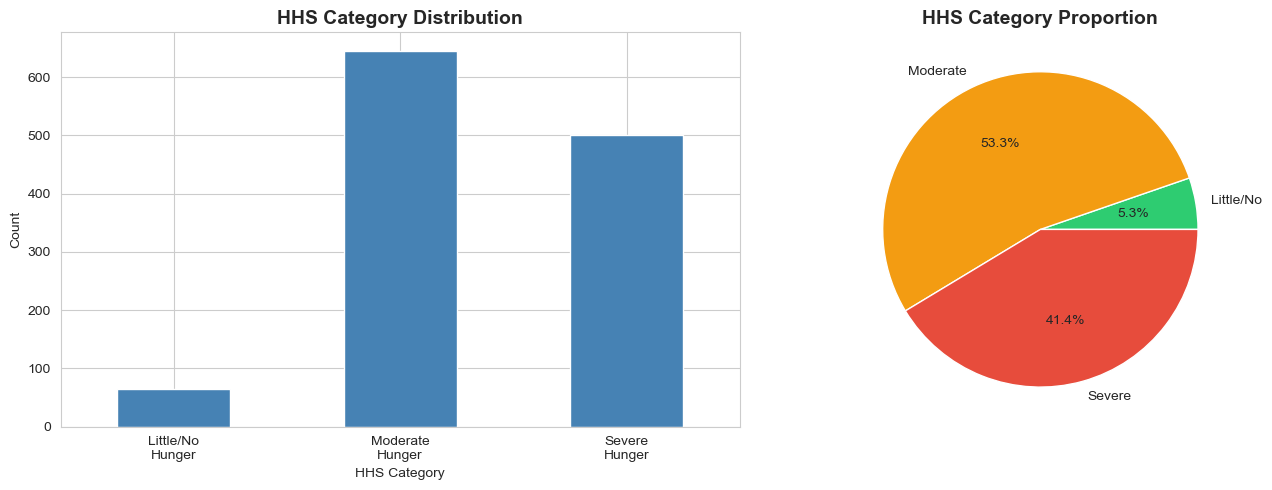

In [6]:
print("="*70)
print("CALCULATING HOUSEHOLD HUNGER SCALE (HHS)")
print("="*70)

# Map frequency responses to numeric values
freq_map = {
    'Rarely': 1,
    'Sometimes': 1,
    'Mostly': 2,
    'Never': 0
}

# HHS is based on three questions: Q7, Q8, Q9
hhs_cols = ['Q7', 'Q8', 'Q9']
hhs_scores = pd.DataFrame()

for col in hhs_cols:
    if col in df.columns:
        hhs_scores[col] = df[col].map(freq_map).fillna(0)

# Sum scores
hhs_total = hhs_scores.sum(axis=1)

# Categorize according to standard HHS thresholds
# 0-1: Little to no hunger (0)
# 2-3: Moderate hunger (1)
# 4-6: Severe hunger (2)
hhs_category = pd.cut(hhs_total,
                      bins=[-0.1, 1, 3, 6],
                      labels=[0, 1, 2],
                      include_lowest=True).astype(int)

df['HHS_Score'] = hhs_total
df['HHS_Category'] = hhs_category

# Display distribution
print("\nHHS Category Distribution:")
category_names = {0: 'Little/No hunger', 1: 'Moderate hunger', 2: 'Severe hunger'}
for cat, count in df['HHS_Category'].value_counts().sort_index().items():
    pct = (count / len(df)) * 100
    print(f"  {category_names[cat]}: {count} ({pct:.1f}%)")

# %%
# Visualize target distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
df['HHS_Category'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('HHS Category Distribution', fontweight='bold', fontsize=14)
ax[0].set_xlabel('HHS Category')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Little/No\nHunger', 'Moderate\nHunger', 'Severe\nHunger'], rotation=0)

# Pie chart
df['HHS_Category'].value_counts().sort_index().plot(kind='pie', ax=ax[1], autopct='%1.1f%%',
                                                      labels=['Little/No', 'Moderate', 'Severe'],
                                                      colors=['#2ecc71', '#f39c12', '#e74c3c'])
ax[1].set_title('HHS Category Proportion', fontweight='bold', fontsize=14)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

,Q31,Q32
count,1209.000000,1209.000000
mean,37.971878,5.629446
std,9.623588,1.797716
min,19.000000,3.000000
25%,30.000000,4.000000
50%,37.000000,5.000000
75%,45.000000,7.000000
max,59.000000,20.000000


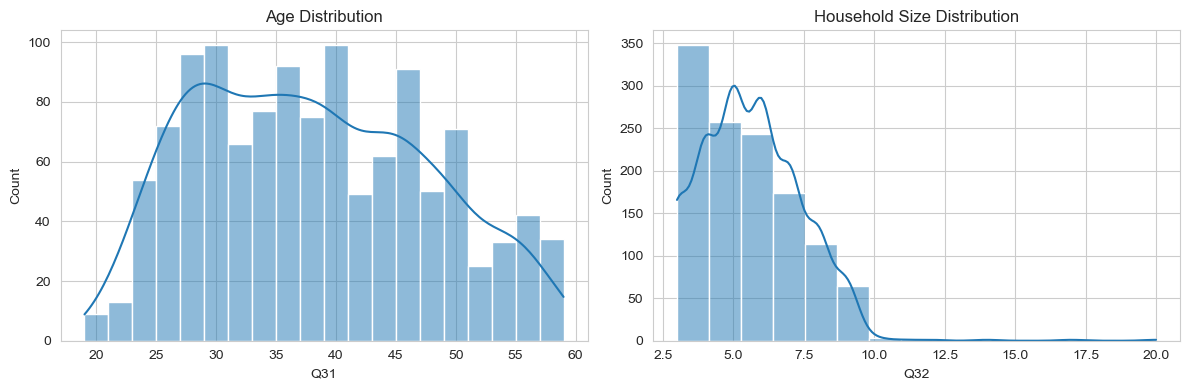

In [7]:
display(df[["Q31", "Q32"]].describe())

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df["Q31"], bins=20, kde=True)
plt.title("Age Distribution")

plt.subplot(1,2,2)
sns.histplot(df["Q32"], bins=15, kde=True)
plt.title("Household Size Distribution")

plt.tight_layout()
plt.show()

### STEP 6: Feature Engineering


FEATURE ENGINEERING
✓ Delta_BMI calculated (mean: -24.53)
✓ Weight_Loss calculated (mean: 64.09 kg)
✓ High-Risk interaction term created
✓ Displacement count processed
✓ Shelter vulnerability score created
✓ Water access binary created
✓ Geographic risk indicator created

✅ Feature engineering complete!


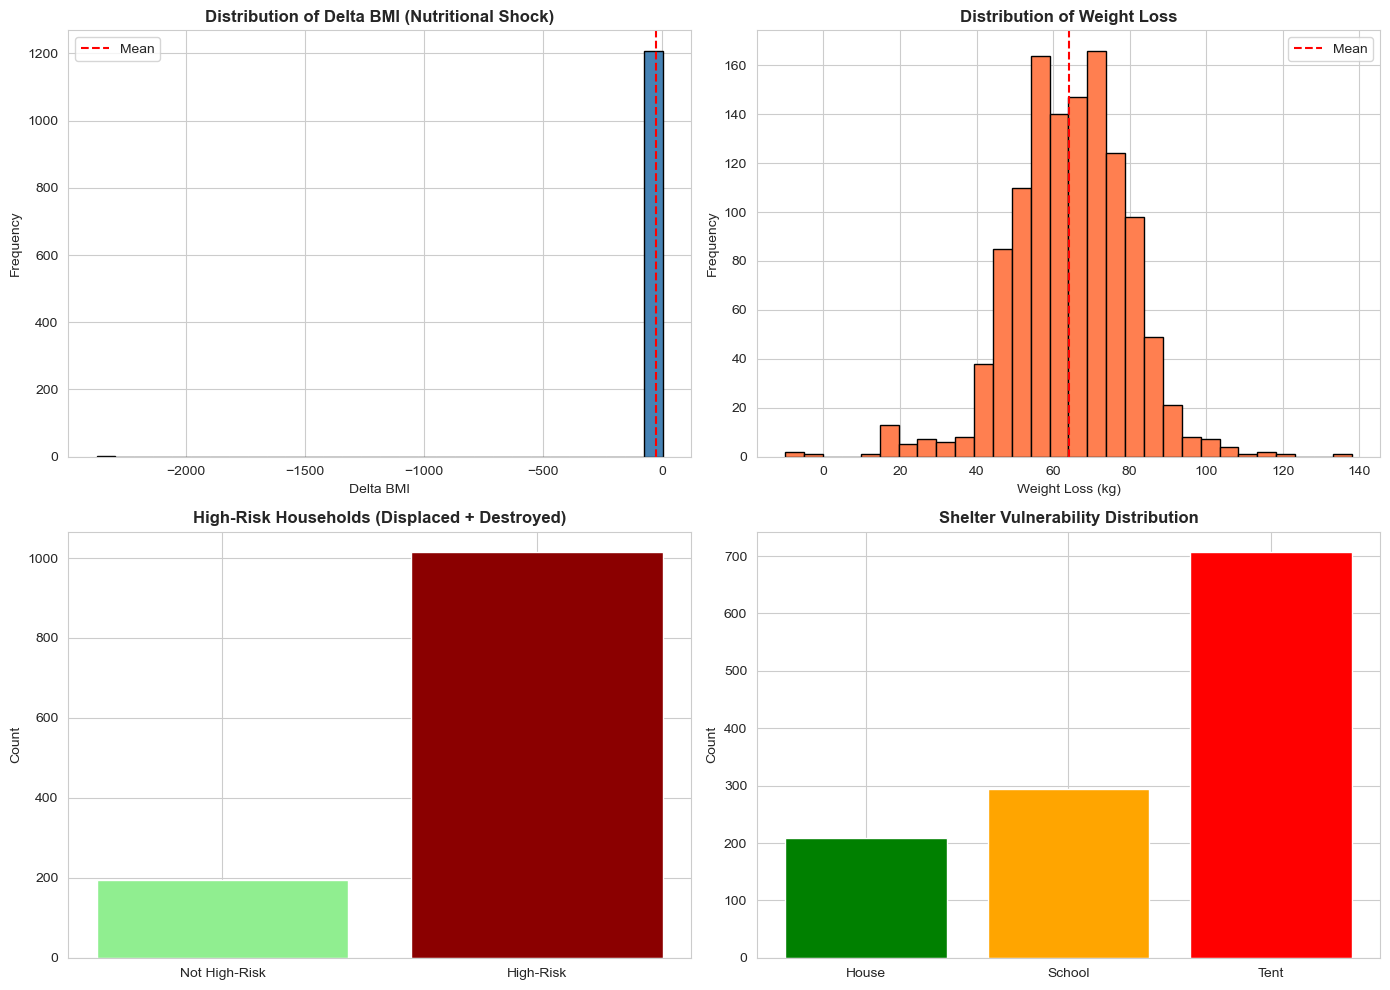

In [8]:
print("="*70)
print("FEATURE ENGINEERING")
print("="*70)

# 1. Nutritional Shock Index (ΔBMI)
if all(col in df.columns for col in ['Q40', 'Q41', 'Q42']):
    # Q40: Weight before, Q41: Weight after, Q42: Height
    weight_before = pd.to_numeric(df['Q40'], errors='coerce')
    weight_after = pd.to_numeric(df['Q41'], errors='coerce')
    height = pd.to_numeric(df['Q42'], errors='coerce')

    # Convert height from cm to m if necessary
    height_m = height / 100 if (height > 3).any() else height

    # Calculate BMI change
    bmi_before = weight_before / (height_m ** 2)
    bmi_after = weight_after / (height_m ** 2)
    df['Delta_BMI'] = bmi_after - bmi_before

    # Also calculate absolute weight loss
    df['Weight_Loss'] = weight_before - weight_after

    print(f"✓ Delta_BMI calculated (mean: {df['Delta_BMI'].mean():.2f})")
    print(f"✓ Weight_Loss calculated (mean: {df['Weight_Loss'].mean():.2f} kg)")

# 2. High-Risk Household Interaction Terms
if 'Q29' in df.columns and 'Q47' in df.columns:
    displaced = pd.to_numeric(df['Q29'], errors='coerce') > 0
    house_destroyed = df['Q47'].isin(['ComplDestruction', 'PartDestruction'])
    df['HighRisk_Displaced_Destroyed'] = (displaced & house_destroyed).astype(int)
    print("✓ High-Risk interaction term created")

# 3. Displacement intensity
if 'Q29' in df.columns:
    df['Displacement_Count'] = pd.to_numeric(df['Q29'], errors='coerce').fillna(0)
    print("✓ Displacement count processed")

# 4. Shelter vulnerability score
if 'Q49' in df.columns:
    shelter_vulnerability = {'Tent': 2, 'School': 1, 'House': 0}
    df['Shelter_Vulnerability'] = df['Q49'].map(shelter_vulnerability).fillna(1)
    print("✓ Shelter vulnerability score created")

# 5. Water access binary
if 'Q50' in df.columns:
    df['No_Water_Access'] = (df['Q50'] == 'No').astype(int)
    print("✓ Water access binary created")

# 6. Geographic risk (Northern governorates are higher risk)
if 'Q28' in df.columns:
    high_risk_gov = ['North Gaza', 'Gaza']
    df['HighRisk_Geography'] = df['Q28'].isin(high_risk_gov).astype(int)
    print("✓ Geographic risk indicator created")

print("\n✅ Feature engineering complete!")

# %%
# Visualize engineered features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Delta BMI distribution
axes[0, 0].hist(df['Delta_BMI'].dropna(), bins=30, color='steelblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Delta BMI (Nutritional Shock)', fontweight='bold')
axes[0, 0].set_xlabel('Delta BMI')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Delta_BMI'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

# Weight Loss distribution
axes[0, 1].hist(df['Weight_Loss'].dropna(), bins=30, color='coral', edgecolor='black')
axes[0, 1].set_title('Distribution of Weight Loss', fontweight='bold')
axes[0, 1].set_xlabel('Weight Loss (kg)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['Weight_Loss'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()

# High-Risk Households
axes[1, 0].bar(['Not High-Risk', 'High-Risk'],
               df['HighRisk_Displaced_Destroyed'].value_counts().sort_index(),
               color=['lightgreen', 'darkred'])
axes[1, 0].set_title('High-Risk Households (Displaced + Destroyed)', fontweight='bold')
axes[1, 0].set_ylabel('Count')

# Shelter Vulnerability
axes[1, 1].bar(['House', 'School', 'Tent'],
               df['Shelter_Vulnerability'].value_counts().sort_index(),
               color=['green', 'orange', 'red'])
axes[1, 1].set_title('Shelter Vulnerability Distribution', fontweight='bold')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


### STEP 7: Prepare Features and Target


In [9]:
# %%
print("="*70)
print("PREPARING FEATURES AND TARGET")
print("="*70)

# Define features to exclude
exclude_cols = ['HHS_Score', 'HHS_Category', 'Q7', 'Q8', 'Q9']

# Select features
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols].copy()
y = df['HHS_Category'].copy()

print(f"\nFeature set shape: {X.shape}")
print(f"Target set shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts().sort_index())


PREPARING FEATURES AND TARGET

Feature set shape: (1209, 54)
Target set shape: (1209,)

Target distribution:
HHS_Category
0     64
1    645
2    500
Name: count, dtype: int64


HHS_Category,0,1,2
Q47,,,
ComplDestruction,5.63,49.62,44.75
Don'tKnow,50.00,33.33,16.67
DontKnow,0.00,66.67,33.33
No أعلم,100.00,0.00,0.00
PartDestruction,4.32,53.51,42.16
PartDestruction,100.00,0.00,0.00
Sound,3.12,71.88,25.00
Sound,100.00,0.00,0.00


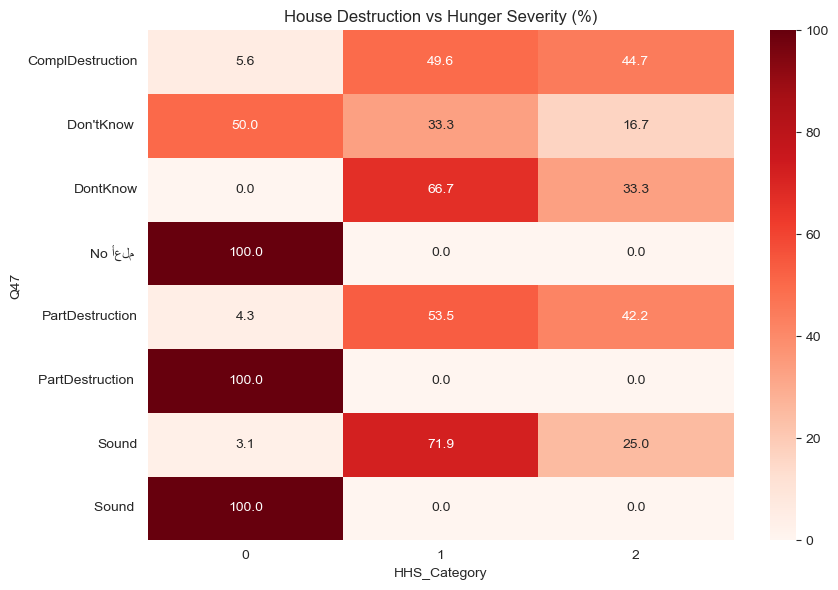

In [10]:
ct_destruction = pd.crosstab(
    df["Q47"],
    df["HHS_Category"],
    normalize="index"
) * 100

display(ct_destruction.round(2))

plt.figure(figsize=(9,6))
sns.heatmap(ct_destruction, annot=True, fmt=".1f", cmap="Reds")
plt.title("House Destruction vs Hunger Severity (%)")
plt.tight_layout()
plt.show()

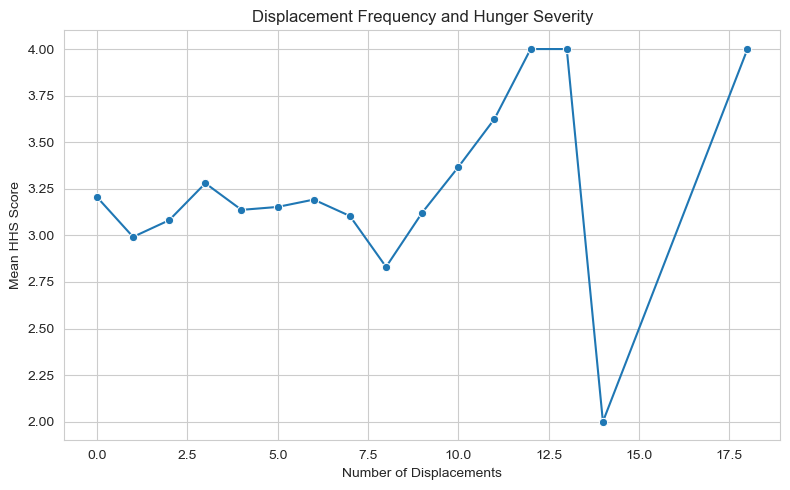

In [11]:
disp_hhs = df.groupby("Q29")["HHS_Score"].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=disp_hhs.index, y=disp_hhs.values, marker="o")
plt.xlabel("Number of Displacements")
plt.ylabel("Mean HHS Score")
plt.title("Displacement Frequency and Hunger Severity")
plt.tight_layout()
plt.show()

### STEP 8: Encode Categorical Features


In [12]:
print("="*70)
print("ENCODING CATEGORICAL FEATURES")
print("="*70)

X_encoded = X.copy()

# Identify categorical columns
categorical_cols = X_encoded.select_dtypes(include=['object']).columns.tolist()

# Ordinal features (have inherent order)
ordinal_features = {
    'Q34': ['Low', 'Medium', 'High'],
}

# Nominal features (no inherent order) - use one-hot encoding
nominal_features = [col for col in categorical_cols if col not in ordinal_features.keys()]

# Apply label encoding to ordinal features
label_encoders = {}
for col, order in ordinal_features.items():
    if col in X_encoded.columns:
        le = LabelEncoder()
        le.fit(order)
        X_encoded[col] = le.transform(X_encoded[col])
        label_encoders[col] = le

# Apply one-hot encoding to nominal features
if nominal_features:
    X_encoded = pd.get_dummies(X_encoded, columns=nominal_features, drop_first=True)
    print(f"✓ One-hot encoded {len(nominal_features)} nominal features")

print(f"\nShape after encoding: {X_encoded.shape}")

ENCODING CATEGORICAL FEATURES
✓ One-hot encoded 36 nominal features

Shape after encoding: (1209, 155)


### STEP 9: Scale Numerical Features


In [13]:
print("="*70)
print("SCALING NUMERICAL FEATURES")
print("="*70)

# Identify numerical columns
numerical_cols = X_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Scale numerical features
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])

print(f"✓ Scaled {len(numerical_cols)} numerical features")
print(f"\nFinal feature set shape: {X_scaled.shape}")


SCALING NUMERICAL FEATURES
✓ Scaled 18 numerical features

Final feature set shape: (1209, 155)


### STEP 10: Train-Test Split (Stratified)


In [14]:
# إزالة أي قيم مفقودة
X_scaled_clean = X_scaled[~y.isna()]
y_clean = y[~y.isna()]


In [15]:
print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Create stratification variable (target + governorate if available)
if 'Q28' in X.columns:
    # Combine target and governorate for stratification
    stratify_var = y.astype(str) + "_" + X['Q28'].astype(str)
else:
    stratify_var = y

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_clean, y_clean,
    test_size=0.2,
    random_state=42,
    stratify=y_clean
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

print(f"\nTraining set target distribution:")
print(y_train.value_counts().sort_index())

print(f"\nTest set target distribution:")
print(y_test.value_counts().sort_index())

TRAIN-TEST SPLIT
Training set: 967 samples
Test set: 242 samples

Training set target distribution:
HHS_Category
0     51
1    516
2    400
Name: count, dtype: int64

Test set target distribution:
HHS_Category
0     13
1    129
2    100
Name: count, dtype: int64


### STEP 11: Handle Class Imbalance (Oversampling)


In [16]:
print("="*70)
print("HANDLING CLASS IMBALANCE")
print("="*70)

print("Before oversampling:")
print(y_train.value_counts().sort_index())

# Convert to DataFrame for easier manipulation
train_df = X_train.copy()
train_df['target'] = y_train.values

# Separate by class
class_0 = train_df[train_df['target'] == 0]
class_1 = train_df[train_df['target'] == 1]
class_2 = train_df[train_df['target'] == 2]

# Find majority class size
max_size = max(len(class_0), len(class_1), len(class_2))

# Oversample minority classes
class_0_oversampled = resample(class_0, replace=True, n_samples=max_size, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_size, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_size, random_state=42)

# Combine oversampled classes
train_oversampled = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

# Shuffle
train_oversampled = train_oversampled.sample(frac=1, random_state=42)

# Split back into X and y
y_train = train_oversampled['target']
X_train = train_oversampled.drop('target', axis=1)

print("\nAfter oversampling:")
print(y_train.value_counts().sort_index())
print(f"New training set size: {len(y_train)}")


HANDLING CLASS IMBALANCE
Before oversampling:
HHS_Category
0     51
1    516
2    400
Name: count, dtype: int64

After oversampling:
target
0    516
1    516
2    516
Name: count, dtype: int64
New training set size: 1548


### STEP 12: Train Model 1 - Logistic Regression


In [17]:
print("="*70)
print("TRAINING LOGISTIC REGRESSION")
print("="*70)

# Train Logistic Regression
lr_model = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("✅ Logistic Regression trained successfully!")

# Evaluate
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred_lr, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['Little/No Hunger', 'Moderate Hunger', 'Severe Hunger']))


TRAINING LOGISTIC REGRESSION
✅ Logistic Regression trained successfully!

Evaluation Metrics:
Accuracy: 0.6736
Weighted F1-Score: 0.6754

Classification Report:
                  precision    recall  f1-score   support

Little/No Hunger       0.48      0.77      0.59        13
 Moderate Hunger       0.76      0.62      0.68       129
   Severe Hunger       0.63      0.73      0.68       100

        accuracy                           0.67       242
       macro avg       0.62      0.71      0.65       242
    weighted avg       0.69      0.67      0.68       242



### STEP 13: Train Model 2 - Random Forest


In [18]:
print("="*70)
print("TRAINING RANDOM FOREST")
print("="*70)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("✅ Random Forest trained successfully!")

# Evaluate
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Little/No Hunger', 'Moderate Hunger', 'Severe Hunger']))

TRAINING RANDOM FOREST
✅ Random Forest trained successfully!

Evaluation Metrics:
Accuracy: 0.7025
Weighted F1-Score: 0.7068

Classification Report:
                  precision    recall  f1-score   support

Little/No Hunger       0.42      0.85      0.56        13
 Moderate Hunger       0.80      0.65      0.72       129
   Severe Hunger       0.68      0.75      0.71       100

        accuracy                           0.70       242
       macro avg       0.63      0.75      0.66       242
    weighted avg       0.73      0.70      0.71       242



### STEP 14: Train Model 3 - Gradient Boosting


In [19]:
print("="*70)
print("TRAINING GRADIENT BOOSTING")
print("="*70)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=4,
    subsample=0.8,
    random_state=42
)

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("✅ Gradient Boosting trained successfully!")

# Evaluate
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Weighted F1-Score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb,
                          target_names=['Little/No Hunger', 'Moderate Hunger', 'Severe Hunger']))

TRAINING GRADIENT BOOSTING
✅ Gradient Boosting trained successfully!

Evaluation Metrics:
Accuracy: 0.7562
Weighted F1-Score: 0.7567

Classification Report:
                  precision    recall  f1-score   support

Little/No Hunger       0.63      0.92      0.75        13
 Moderate Hunger       0.80      0.75      0.78       129
   Severe Hunger       0.73      0.74      0.73       100

        accuracy                           0.76       242
       macro avg       0.72      0.81      0.75       242
    weighted avg       0.76      0.76      0.76       242



### STEP 15: Model Comparison


MODEL COMPARISON

               Model  Accuracy  Weighted F1  Macro F1  Severe Hunger Recall  Severe Hunger Precision
  Gradient Boosting  0.756198     0.756700  0.752891                  0.74                 0.725490
      Random Forest  0.702479     0.706772  0.664317                  0.75                 0.675676
Logistic Regression  0.673554     0.675392  0.649307                  0.73                 0.629310

🏆 Best Model: Gradient Boosting


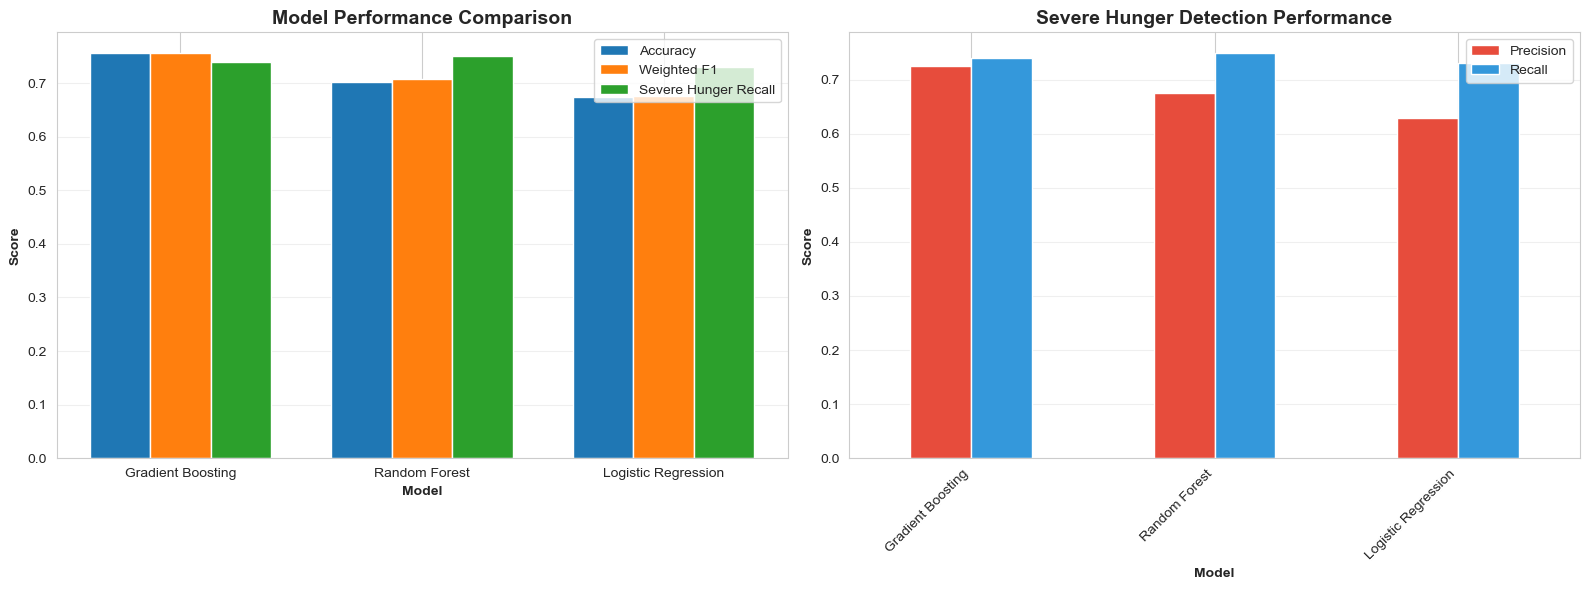

In [20]:
print("="*70)
print("MODEL COMPARISON")
print("="*70)

# Create comparison DataFrame
comparison_data = []

for model_name, y_pred in [('Logistic Regression', y_pred_lr),
                           ('Random Forest', y_pred_rf),
                           ('Gradient Boosting', y_pred_gb)]:

    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Weighted F1': f1_score(y_test, y_pred, average='weighted'),
        'Macro F1': f1_score(y_test, y_pred, average='macro'),
        'Severe Hunger Recall': recall[2],
        'Severe Hunger Precision': precision[2]
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Weighted F1', ascending=False)

print("\n", comparison_df.to_string(index=False))

best_model = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model}")

# %%
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy and F1 comparison
metrics_to_plot = ['Accuracy', 'Weighted F1', 'Severe Hunger Recall']
x = np.arange(len(comparison_df))
width = 0.25

for i, metric in enumerate(metrics_to_plot):
    axes[0].bar(x + i*width, comparison_df[metric], width, label=metric)

axes[0].set_xlabel('Model', fontweight='bold')
axes[0].set_ylabel('Score', fontweight='bold')
axes[0].set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(comparison_df['Model'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Severe hunger metrics (critical for humanitarian use)
severe_metrics = comparison_df[['Model', 'Severe Hunger Precision', 'Severe Hunger Recall']]
severe_metrics.plot(x='Model', kind='bar', ax=axes[1], color=['#e74c3c', '#3498db'])
axes[1].set_title('Severe Hunger Detection Performance', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Score', fontweight='bold')
axes[1].set_xlabel('Model', fontweight='bold')
axes[1].legend(['Precision', 'Recall'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### STEP 16: Confusion Matrices


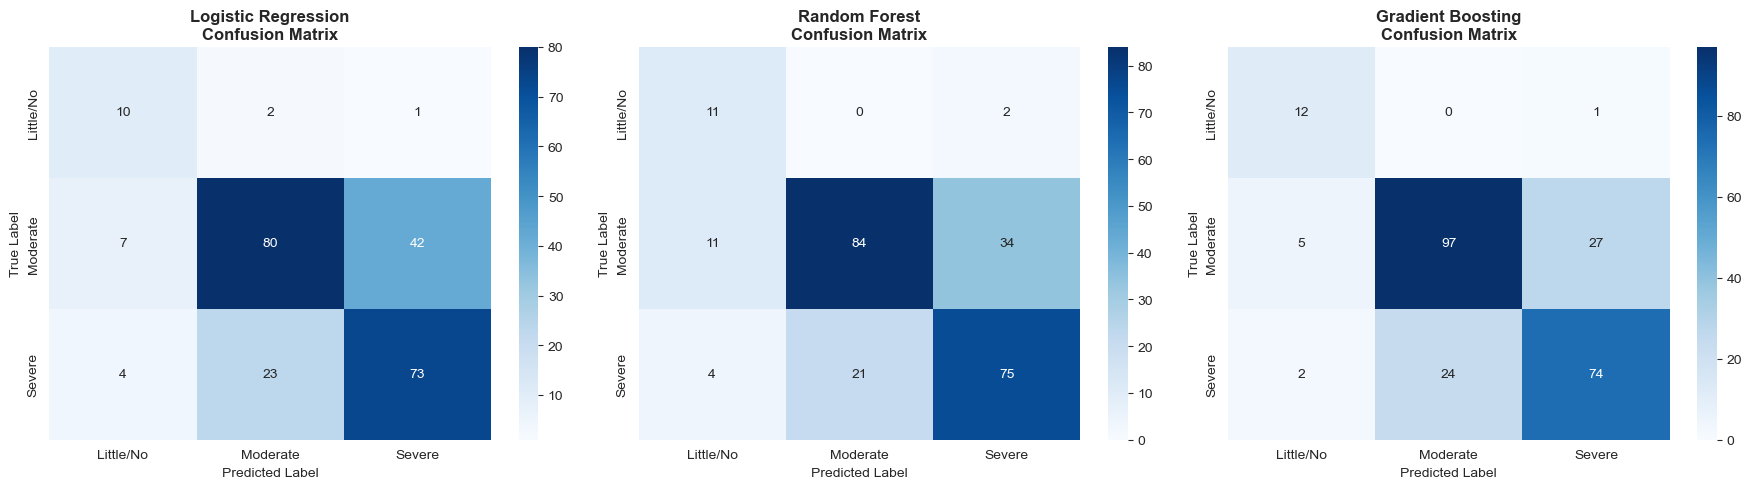

In [21]:
#Plot confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_and_preds = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('Gradient Boosting', y_pred_gb)
]

class_names = ['Little/No', 'Moderate', 'Severe']

for idx, (model_name, y_pred) in enumerate(models_and_preds):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[idx], cbar=True)

    axes[idx].set_title(f'{model_name}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.show()

### STEP 17: Feature Importance (Tree Models)


RANDOM FOREST - TOP 15 FEATURES
           feature  importance
        Q25_Rarely    0.033718
      Q28_Mid.Gaza    0.028235
               Q42    0.026798
          Q36_Yes     0.023286
        Q13_Rarely    0.023095
               Q32    0.022996
               Q29    0.022996
Displacement_Count    0.022737
         Q11_Never    0.021204
         Q23_Never    0.021193
               Q44    0.021115
            Q6_Yes    0.020919
       Weight_Loss    0.020244
        Q18_Rarely    0.019676
               Q31    0.019476


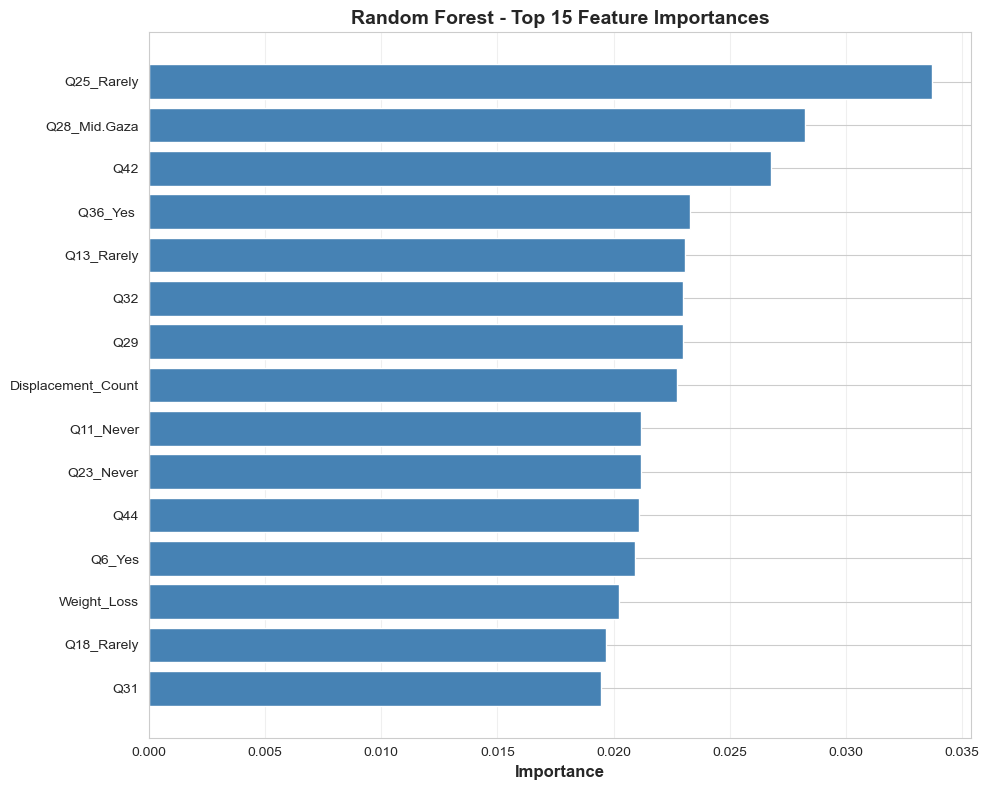

GRADIENT BOOSTING - TOP 15 FEATURES
      feature  importance
   Q25_Rarely    0.086245
     Q36_Yes     0.076801
 Q28_Mid.Gaza    0.049457
          Q32    0.048262
          Q42    0.035730
    Q2O_Never    0.034452
          Q41    0.028308
   Q2O_Rarely    0.027918
    Delta_BMI    0.027266
          Q31    0.026406
          Q40    0.026038
     Q48_City    0.020862
Q24_Sometimes    0.020643
  Weight_Loss    0.019614
          Q44    0.019199


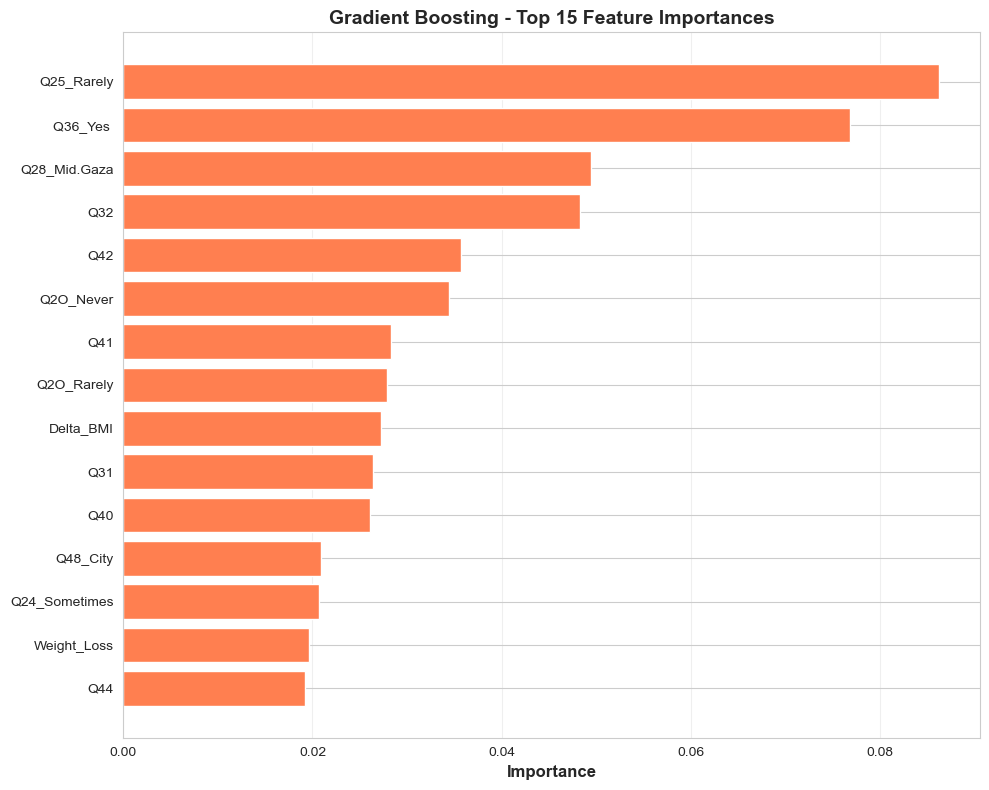

In [22]:
# Random Forest Feature Importance
print("="*70)
print("RANDOM FOREST - TOP 15 FEATURES")
print("="*70)

rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(rf_importance.head(15).to_string(index=False))

# %%
# Visualize Random Forest feature importance
fig, ax = plt.subplots(figsize=(10, 8))

top_15_rf = rf_importance.head(15)
ax.barh(range(len(top_15_rf)), top_15_rf['importance'], color='steelblue')
ax.set_yticks(range(len(top_15_rf)))
ax.set_yticklabels(top_15_rf['feature'])
ax.invert_yaxis()
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Random Forest - Top 15 Feature Importances', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# %%
# Gradient Boosting Feature Importance
print("="*70)
print("GRADIENT BOOSTING - TOP 15 FEATURES")
print("="*70)

gb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print(gb_importance.head(15).to_string(index=False))

# %%
# Visualize Gradient Boosting feature importance
fig, ax = plt.subplots(figsize=(10, 8))

top_15_gb = gb_importance.head(15)
ax.barh(range(len(top_15_gb)), top_15_gb['importance'], color='coral')
ax.set_yticks(range(len(top_15_gb)))
ax.set_yticklabels(top_15_gb['feature'])
ax.invert_yaxis()
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Gradient Boosting - Top 15 Feature Importances', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### STEP 18: Final Summary and Recommendations


In [23]:
print("="*80)
print("FINAL PROJECT SUMMARY")
print("="*80)

print(f"\n📊 DATASET:")
print(f"   - Total Households: {len(df)}")
print(f"   - Features Used: {X_scaled.shape[1]}")
print(f"   - Train/Test Split: {len(X_train)}/{len(X_test)}")

print(f"\n🎯 TARGET DISTRIBUTION:")
for cat in [0, 1, 2]:
    count = (y == cat).sum()
    pct = (count / len(y)) * 100
    name = category_names[cat]
    print(f"   - {name}: {count} ({pct:.1f}%)")

print(f"\n🏆 BEST MODEL: {best_model}")
best_row = comparison_df.iloc[0]
print(f"   - Accuracy: {best_row['Accuracy']:.4f}")
print(f"   - Weighted F1: {best_row['Weighted F1']:.4f}")
print(f"   - Severe Hunger Recall: {best_row['Severe Hunger Recall']:.4f}")

print(f"\n📈 TOP 5 PREDICTIVE FEATURES:")
if best_model == 'Random Forest':
    top_5 = rf_importance.head(5)
elif best_model == 'Gradient Boosting':
    top_5 = gb_importance.head(5)
else:
    top_5 = None

if top_5 is not None:
    for idx, row in top_5.iterrows():
        print(f"   {idx+1}. {row['feature']}: {row['importance']:.4f}")

print(f"\n💡 HUMANITARIAN RECOMMENDATIONS:")
print(f"   1. Prioritize households with high nutritional shock (Delta BMI)")
print(f"   2. Target completely destroyed homes")
print(f"   3. Focus on northern governorates (Gaza City, North Gaza)")
print(f"   4. Provide multi-sectoral support for high-risk households")
print(f"   5. Retrain model monthly as new data becomes available")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)


FINAL PROJECT SUMMARY

📊 DATASET:
   - Total Households: 1209
   - Features Used: 155
   - Train/Test Split: 1548/242

🎯 TARGET DISTRIBUTION:
   - Little/No hunger: 64 (5.3%)
   - Moderate hunger: 645 (53.3%)
   - Severe hunger: 500 (41.4%)

🏆 BEST MODEL: Gradient Boosting
   - Accuracy: 0.7562
   - Weighted F1: 0.7567
   - Severe Hunger Recall: 0.7400

📈 TOP 5 PREDICTIVE FEATURES:
   103. Q25_Rarely: 0.0862
   127. Q36_Yes : 0.0768
   120. Q28_Mid.Gaza: 0.0495
   3. Q32: 0.0483
   10. Q42: 0.0357

💡 HUMANITARIAN RECOMMENDATIONS:
   1. Prioritize households with high nutritional shock (Delta BMI)
   2. Target completely destroyed homes
   3. Focus on northern governorates (Gaza City, North Gaza)
   4. Provide multi-sectoral support for high-risk households
   5. Retrain model monthly as new data becomes available

✅ ANALYSIS COMPLETE!


### Optional: Save Model for Deployment


In [24]:
# Uncomment to save the best model
import joblib
#
if best_model == 'Gradient Boosting':
     joblib.dump(gb_model, 'best_model_gb.joblib')
     joblib.dump(scaler, 'scaler.joblib')
     print("✅ Model and scaler saved!")
elif best_model == 'Random Forest':
     joblib.dump(rf_model, 'best_model_rf.joblib')
     joblib.dump(scaler, 'scaler.joblib')
     print("✅ Model and scaler saved!")
else:
     joblib.dump(lr_model, 'best_model_lr.joblib')
     joblib.dump(scaler, 'scaler.joblib')
     print("✅ Model and scaler saved!")


✅ Model and scaler saved!
